raw data loaded
binary data created
continuous data created
binary data saved as: data/stroke_data_binary.csv
continuous data saved as: data/stroke_data_cont.csv
BMI PCA data not found, training PCA now...
BMI PCA training data saved as: pca_short/binary/train/BMI.csv
BMI PCA test data saved as: pca_short/binary/test/BMI.csv


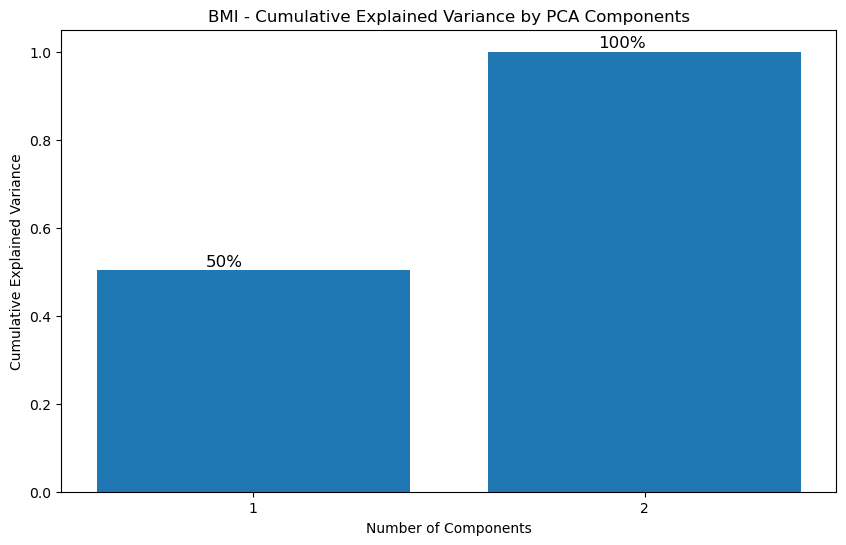

blood_lipids PCA data not found, training PCA now...
blood_lipids PCA training data saved as: pca_short/binary/train/blood_lipids.csv
blood_lipids PCA test data saved as: pca_short/binary/test/blood_lipids.csv


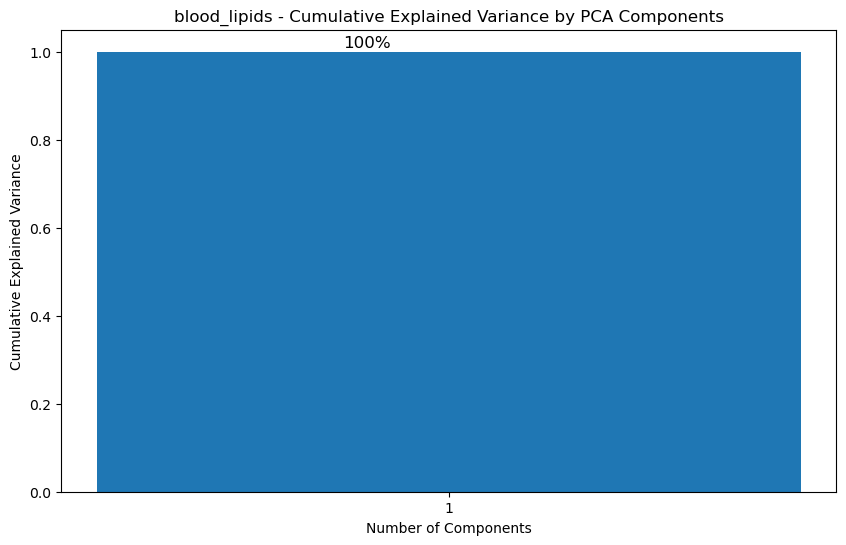

blood_glucose PCA data not found, training PCA now...
blood_glucose PCA training data saved as: pca_short/binary/train/blood_glucose.csv
blood_glucose PCA test data saved as: pca_short/binary/test/blood_glucose.csv


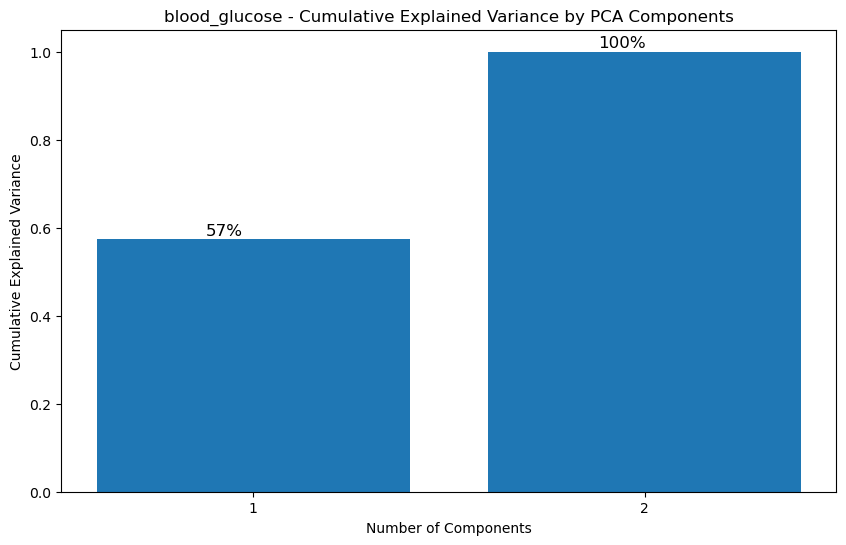

hypertensive PCA data not found, training PCA now...
hypertensive PCA training data saved as: pca_short/binary/train/hypertensive.csv
hypertensive PCA test data saved as: pca_short/binary/test/hypertensive.csv


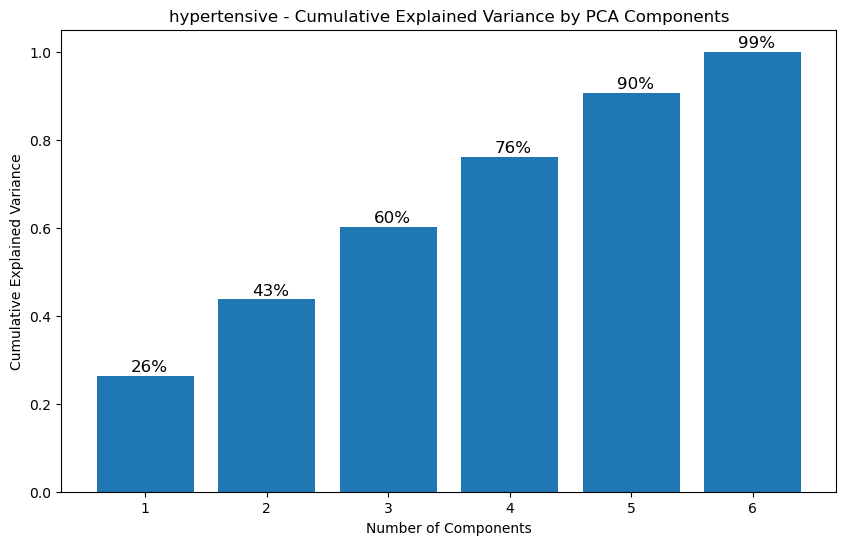

nicotine PCA data not found, training PCA now...
nicotine PCA training data saved as: pca_short/binary/train/nicotine.csv
nicotine PCA test data saved as: pca_short/binary/test/nicotine.csv


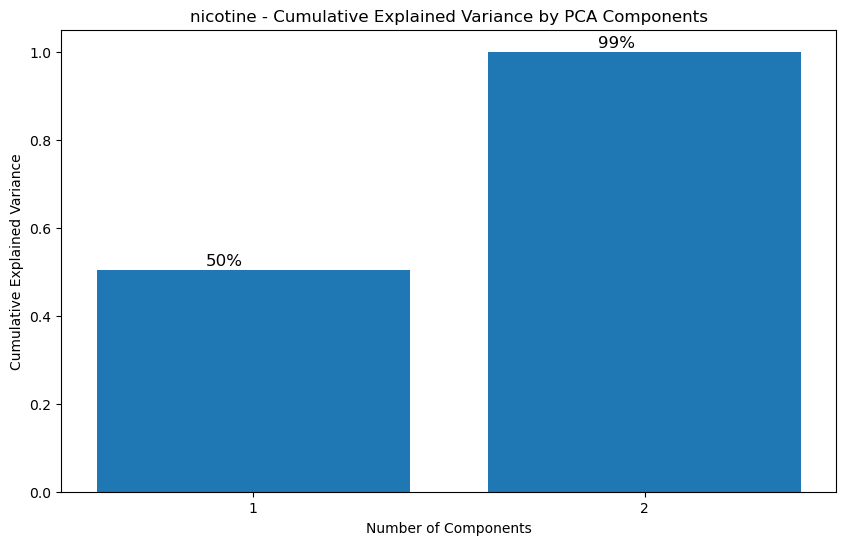

alcohol PCA data not found, training PCA now...
alcohol PCA training data saved as: pca_short/binary/train/alcohol.csv
alcohol PCA test data saved as: pca_short/binary/test/alcohol.csv


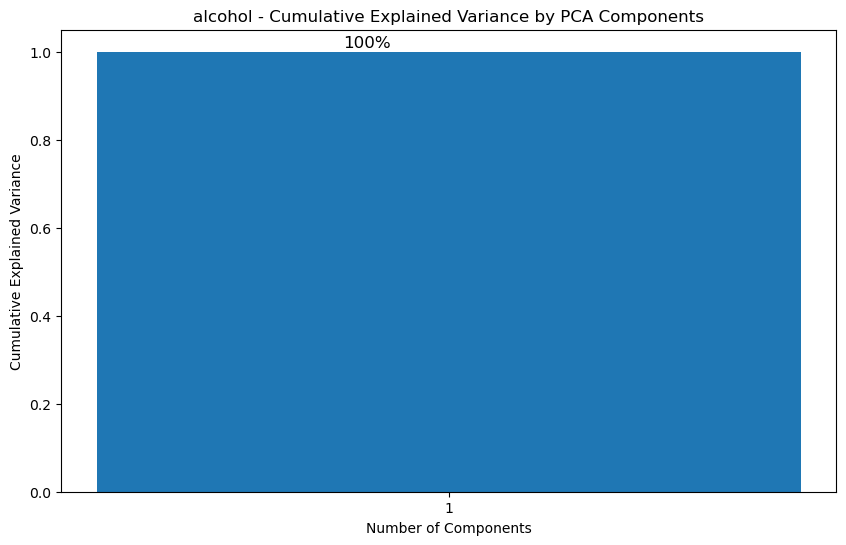

(16612, 1177) (4153, 1177)
(16612, 14) (4153, 14)
(16612, 14) (4153, 14)
(16612, 14) (4153, 14)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

from preprocessing import preprocessing
from pca import pca_load
from pca_all import pca_load_all
from baseline import baseline
from lr import LR
from rf import RF

# short code or full code
code_type = "short"
#code_type = "full"

if code_type == "short":
    filename = "main_dataset_final_3"
elif code_type == "full":
    filename = "main_dataset_final_3_full_icd10"
    
preprocessing(filename)

# binary or continuous
datatype = "binary"
# datatype = "cont"
filename_add = int(code_type == "full")
X = pd.read_csv("data/stroke_data_" + datatype + filename_add*"_full" + ".csv")
X.dropna(inplace=True)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

disease_mapping = {
    #"BMI": ['Z68','E65','E66','E67','E68'], 
    "BMI": ['E65','E66'], 
    "blood_lipids": ['E78'],
    "blood_glucose": ['E10','E11'],
#     "hypertensive": ['I10','I11','I12','I13','I14','I15','I16'],
    "hypertensive": ['I10','I11','I12','I13','I15','I16'],
    "nicotine":['F17','Z72'],
    "alcohol":['F10']
}

# pca vs. baseline
train, test = pca_load(datatype, disease_mapping, X_train, X_test, code_type, pc0_only=True)
# X_train, X_test = pca_load_all(datatype, X_train, X_test)
max_train, max_test = baseline(datatype, disease_mapping, "max", X_train, X_test)
sum_train, sum_test = baseline(datatype, disease_mapping, "sum", X_train, X_test)

print(X_train.shape, X_test.shape)


print(train.shape, test.shape)
print(max_train.shape, max_test.shape)
print(sum_train.shape, sum_test.shape)

# Binary

In [ ]:
# orginal data with all covariates

X = pd.read_csv("data/stroke_data_binary.csv")
X.dropna(inplace=True)
#X= X[X['race'] != 'Black or African American']
or_train, or_test = train_test_split(X, test_size=0.2, random_state=42)
print("By Logistic Regression, result for all original predicitors:")
LR(or_train,or_test,tolerance = 1e-4,iter = 6000, seed = 43)

param_grid = {
    'n_estimators': [100],  
    'max_features': [0.2, 0.4],  
    'max_depth': [10, 20],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 4],  
    'bootstrap': [True, False]  
}
print("Result for Random Forest, result for all original predicitors:")
RF(or_train,or_test,params=param_grid)

In [9]:
# Logistic Regression
# We select several comorbidities and demographics as the predictors.

## baseline: orginal data with the max_aggregation covariates
print("By Logistic Regression, result for sum baseline:")
LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
print("By Logistic Regression, result for max baseline:")
LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
## selected PCA covariates.
print("By Logistic Regression, result for PCA:")
LR(train,test,tolerance = 1e-4,iter = 4000, seed = 43)

By Logistic Regression, result for sum baseline:
[[ 0.56281237  0.2596631   0.47966025  0.1330921  -0.00229895  0.04728685
  -0.00748017  0.75220603 -0.17728083  0.5444151  -0.88868082  0.06976895
   0.16089054  0.13029187  0.17232994 -0.25495485  0.22280492 -0.0398124 ]]
Accuracy: 0.6547074404045269
By Logistic Regression, result for max baseline:
[[ 0.57323518  0.30302147  0.77199649  0.22870314 -0.0071921   0.07642535
  -0.00783426  0.75998524 -0.18894716  0.49580847 -0.90673327  0.02565705
   0.13445624  0.09337341  0.07742214 -0.27907765  0.27651757 -0.00812217]]
Accuracy: 0.6496508548037563
By Logistic Regression, result for PCA:
[[ 0.10890482  0.05971455  0.27416343  0.03473368  0.05137532 -0.07767964
  -0.00561468  0.82135356 -0.13668498  0.62213567 -0.86743313  0.17960247
   0.25976864  0.18954629  0.25527931 -0.23171816  0.2755524  -0.04928873]]
Accuracy: 0.6414640019263184


In [10]:
# Random Forest
# We select several comorbidities and demographics as the predictors.
# Since the number of predicitors is not large, so here 'max_features' is not small.
param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.5,0.8, 0.9],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

## baseline: orginal data with the max_aggregation covariates
print("By Random Forest, result for sum baseline:")
RF(sum_train,sum_test,params=param_grid)
print("By Random Forest, result for max baseline:")
RF(max_train,max_test,params=param_grid)
## selected PCA covariates.
print("By Random Forest, result for PCA:")
RF(train,test,params=param_grid)

By Random Forest, result for sum baseline:
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'bootstrap': True, 'max_depth': 20, 'max_features': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.7105706718035155
By Random Forest, result for max baseline:
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'bootstrap': True, 'max_depth': 20, 'max_features': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7050325066217192
By Random Forest, result for PCA:
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7144233084517216


# Continuous

raw data loaded
binary data created
continuous data created
binary data saved as: data/stroke_data_binary.csv
continuous data saved as: data/stroke_data_cont.csv
BMI PCA data not found, training PCA now...
BMI PCA training data saved as: pca_short/binary/train/BMI.csv
BMI PCA test data saved as: pca_short/binary/test/BMI.csv


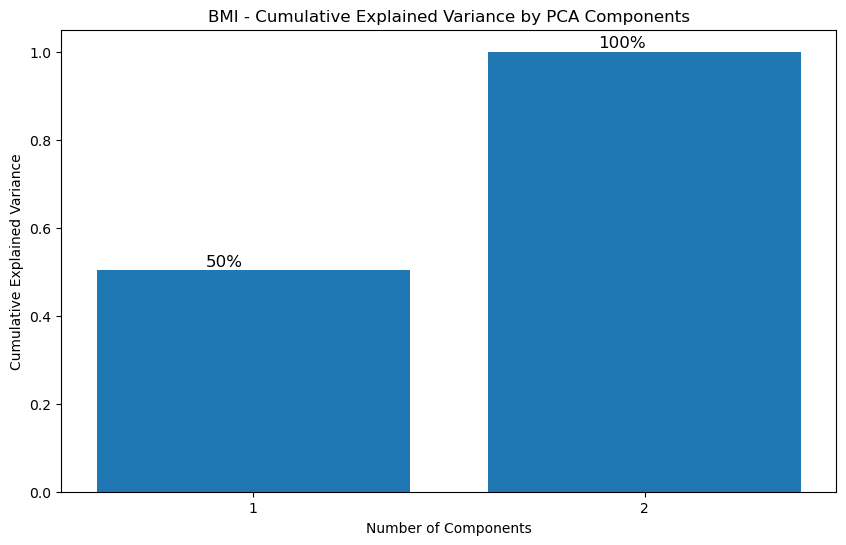

blood_lipids PCA data not found, training PCA now...
blood_lipids PCA training data saved as: pca_short/binary/train/blood_lipids.csv
blood_lipids PCA test data saved as: pca_short/binary/test/blood_lipids.csv


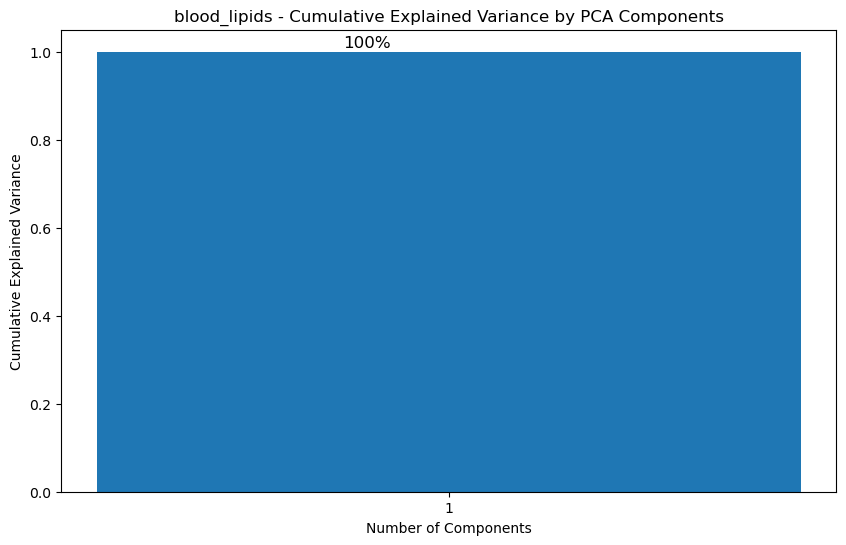

blood_glucose PCA data not found, training PCA now...
blood_glucose PCA training data saved as: pca_short/binary/train/blood_glucose.csv
blood_glucose PCA test data saved as: pca_short/binary/test/blood_glucose.csv


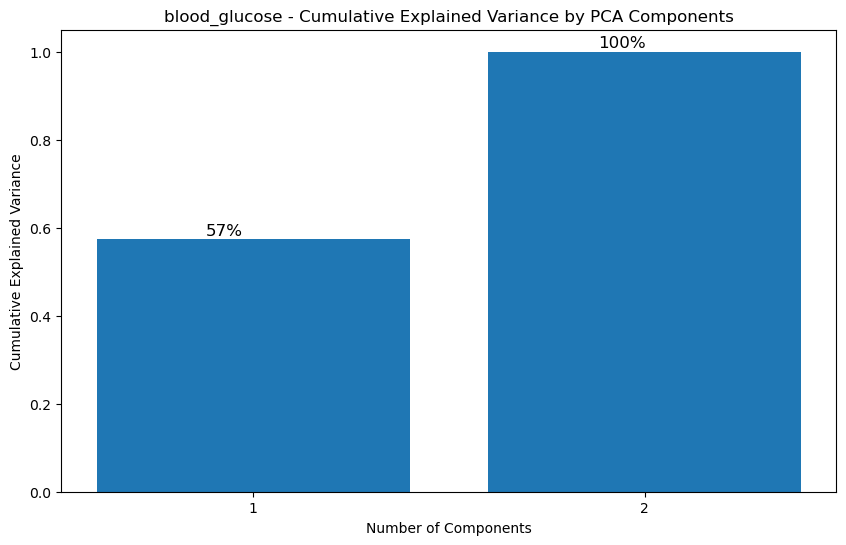

hypertensive PCA data not found, training PCA now...
hypertensive PCA training data saved as: pca_short/binary/train/hypertensive.csv
hypertensive PCA test data saved as: pca_short/binary/test/hypertensive.csv


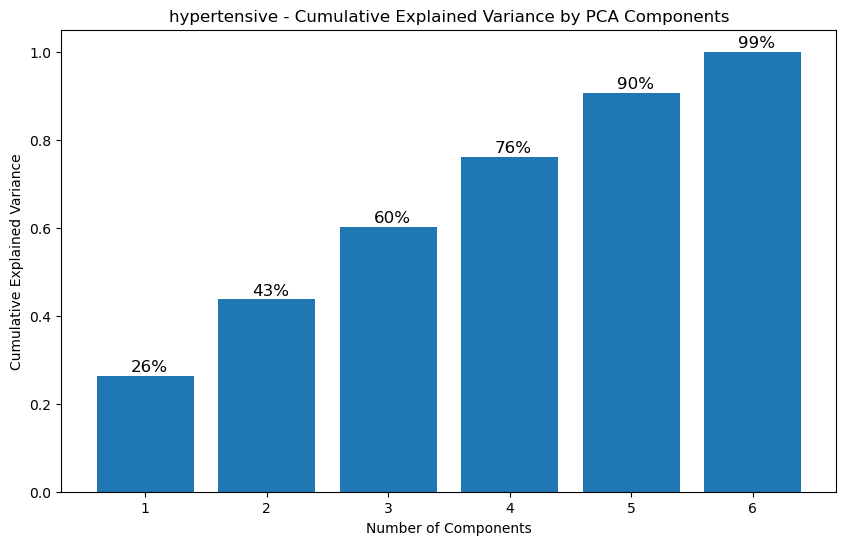

nicotine PCA data not found, training PCA now...
nicotine PCA training data saved as: pca_short/binary/train/nicotine.csv
nicotine PCA test data saved as: pca_short/binary/test/nicotine.csv


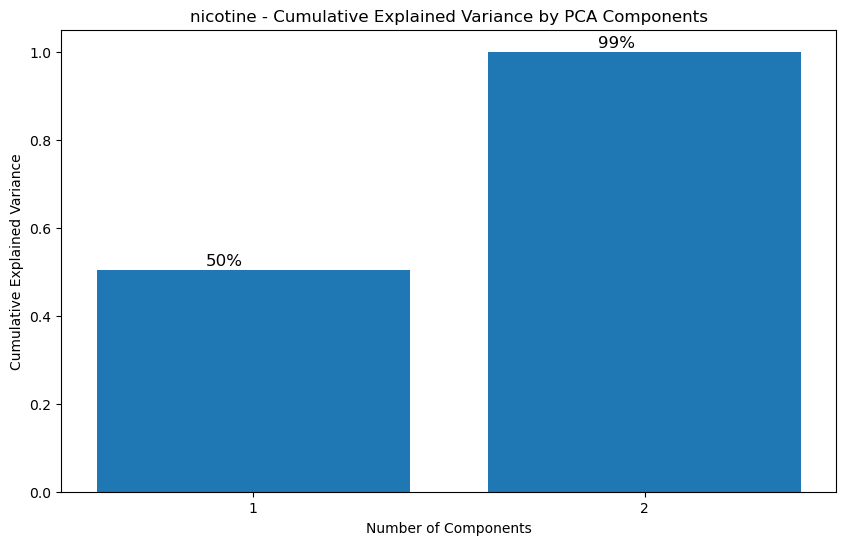

alcohol PCA data not found, training PCA now...
alcohol PCA training data saved as: pca_short/binary/train/alcohol.csv
alcohol PCA test data saved as: pca_short/binary/test/alcohol.csv


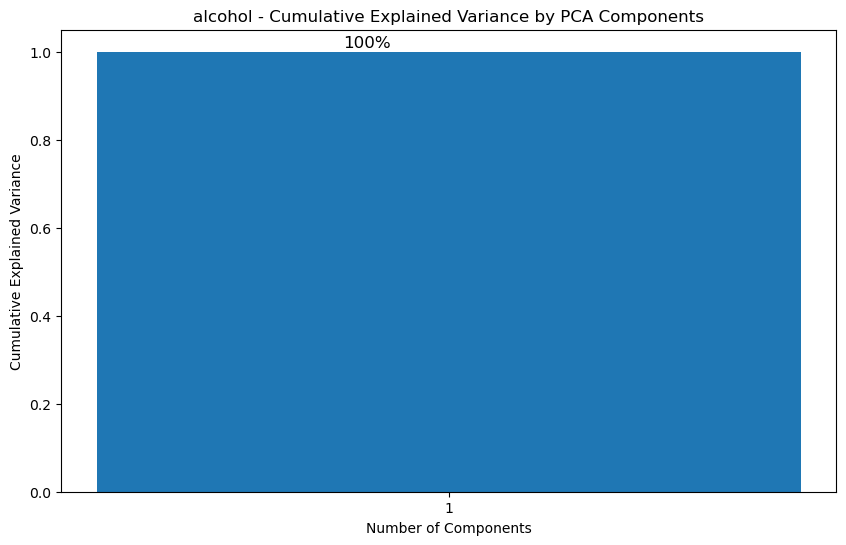

(16612, 1177) (4153, 1177)
(16612, 14) (4153, 14)
(16612, 14) (4153, 14)
(16612, 14) (4153, 14)


In [ ]:

# short code or full code
code_type = "short"
#code_type = "full"

if code_type == "short":
    filename = "main_dataset_final_3"
elif code_type == "full":
    filename = "main_dataset_final_3_full_icd10"
    
#preprocessing(filename)

# binary or continuous
# datatype = "binary"
datatype = "cont"
filename_add = int(code_type == "full")
X = pd.read_csv("data/stroke_data_" + datatype + filename_add*"_full" + ".csv")
X.dropna(inplace=True)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

disease_mapping = {
    #"BMI": ['Z68','E65','E66','E67','E68'], 
    "BMI": ['E65','E66'], 
    "blood_lipids": ['E78'],
    "blood_glucose": ['E10','E11'],
#     "hypertensive": ['I10','I11','I12','I13','I14','I15','I16'],
    "hypertensive": ['I10','I11','I12','I13','I15','I16'],
    "nicotine":['F17','Z72'],
    "alcohol":['F10']
}

# pca vs. baseline
train, test = pca_load(datatype, disease_mapping, X_train, X_test, code_type, pc0_only=True)
# X_train, X_test = pca_load_all(datatype, X_train, X_test)
max_train, max_test = baseline(datatype, disease_mapping, "max", X_train, X_test)
sum_train, sum_test = baseline(datatype, disease_mapping, "sum", X_train, X_test)

print(X_train.shape, X_test.shape)


print(train.shape, test.shape)
print(max_train.shape, max_test.shape)
print(sum_train.shape, sum_test.shape)

In [ ]:
# orginal data with all covariates

X = pd.read_csv("data/stroke_data_binary.csv")
X.dropna(inplace=True)
#X= X[X['race'] != 'Black or African American']
or_train, or_test = train_test_split(X, test_size=0.2, random_state=42)
print("By Logistic Regression, result for LR:")
LR(or_train,or_test,tolerance = 1e-4,iter = 6000, seed = 43)

param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.2, 0.4, 0.6],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}
print("By Logistic Regression, result for RF:")
RF(or_train,or_test,params=param_grid)

In [ ]:
# Logistic Regression
# We select several comorbidities and demographics as the predictors.

## baseline: orginal data with the max_aggregation covariates
print("By Logistic Regression, result for sum baseline:")
LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
print("By Logistic Regression, result for max baseline:")
LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
## selected PCA covariates.
print("By Logistic Regression, result for PCA:")
LR(train,test,tolerance = 1e-4,iter = 4000, seed = 43)

In [ ]:
# Random Forest
# We select several comorbidities and demographics as the predictors.
# Since the number of predicitors is not large, so here 'max_features' is not small.
param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.5,0.8, 0.9],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

## baseline: orginal data with the max_aggregation covariates
print("By Random Forest, result for sum baseline:")
RF(sum_train,sum_test,params=param_grid)
print("By Random Forest, result for max baseline:")
RF(max_train,max_test,params=param_grid)
## selected PCA covariates.
print("By Random Forest, result for PCA:")
RF(train,test,params=param_grid)